# 5.2 pretrain or not

In [1]:
import os
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

def get_scaler_history(log_dir, tag):
    # 加载日志文件
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()

    # 获取所有tags（包括scalars, images等）
    tags = event_acc.Tags()

    # 获取某个特定标量数据，例如训练损失 'train/loss'

    if tag not in tags['scalars']:
        print(f'tag must choose from {tags["scalars"]}')
        raise ValueError

    loss_data = event_acc.Scalars(tag)

    # 提取步数和对应的损失值
    steps = [x.step for x in loss_data]
    values = [x.value for x in loss_data]
    return steps, values


In [2]:
# 获取数据
root = '/home/xiaoxinyu/pkufiber/'
log_dir1 = root+'experiments/1023/1023_eqfdbp_step5_dtaps801_ntaps401_fixD/logs/tensorboard'  # two stage training
log_dir2 = root+'experiments/1023/1023_eqfdbp_step5_dtaps801_ntaps401_fixD_pretrain0/logs/tensorboard'  # one stage training
tag = 'Metric/Qsq'

# 假设 get_scaler_history 是你用来读取 tensorboard 日志数据的函数
steps, value1 = get_scaler_history(log_dir1, tag)
_, value2 = get_scaler_history(log_dir2, tag)


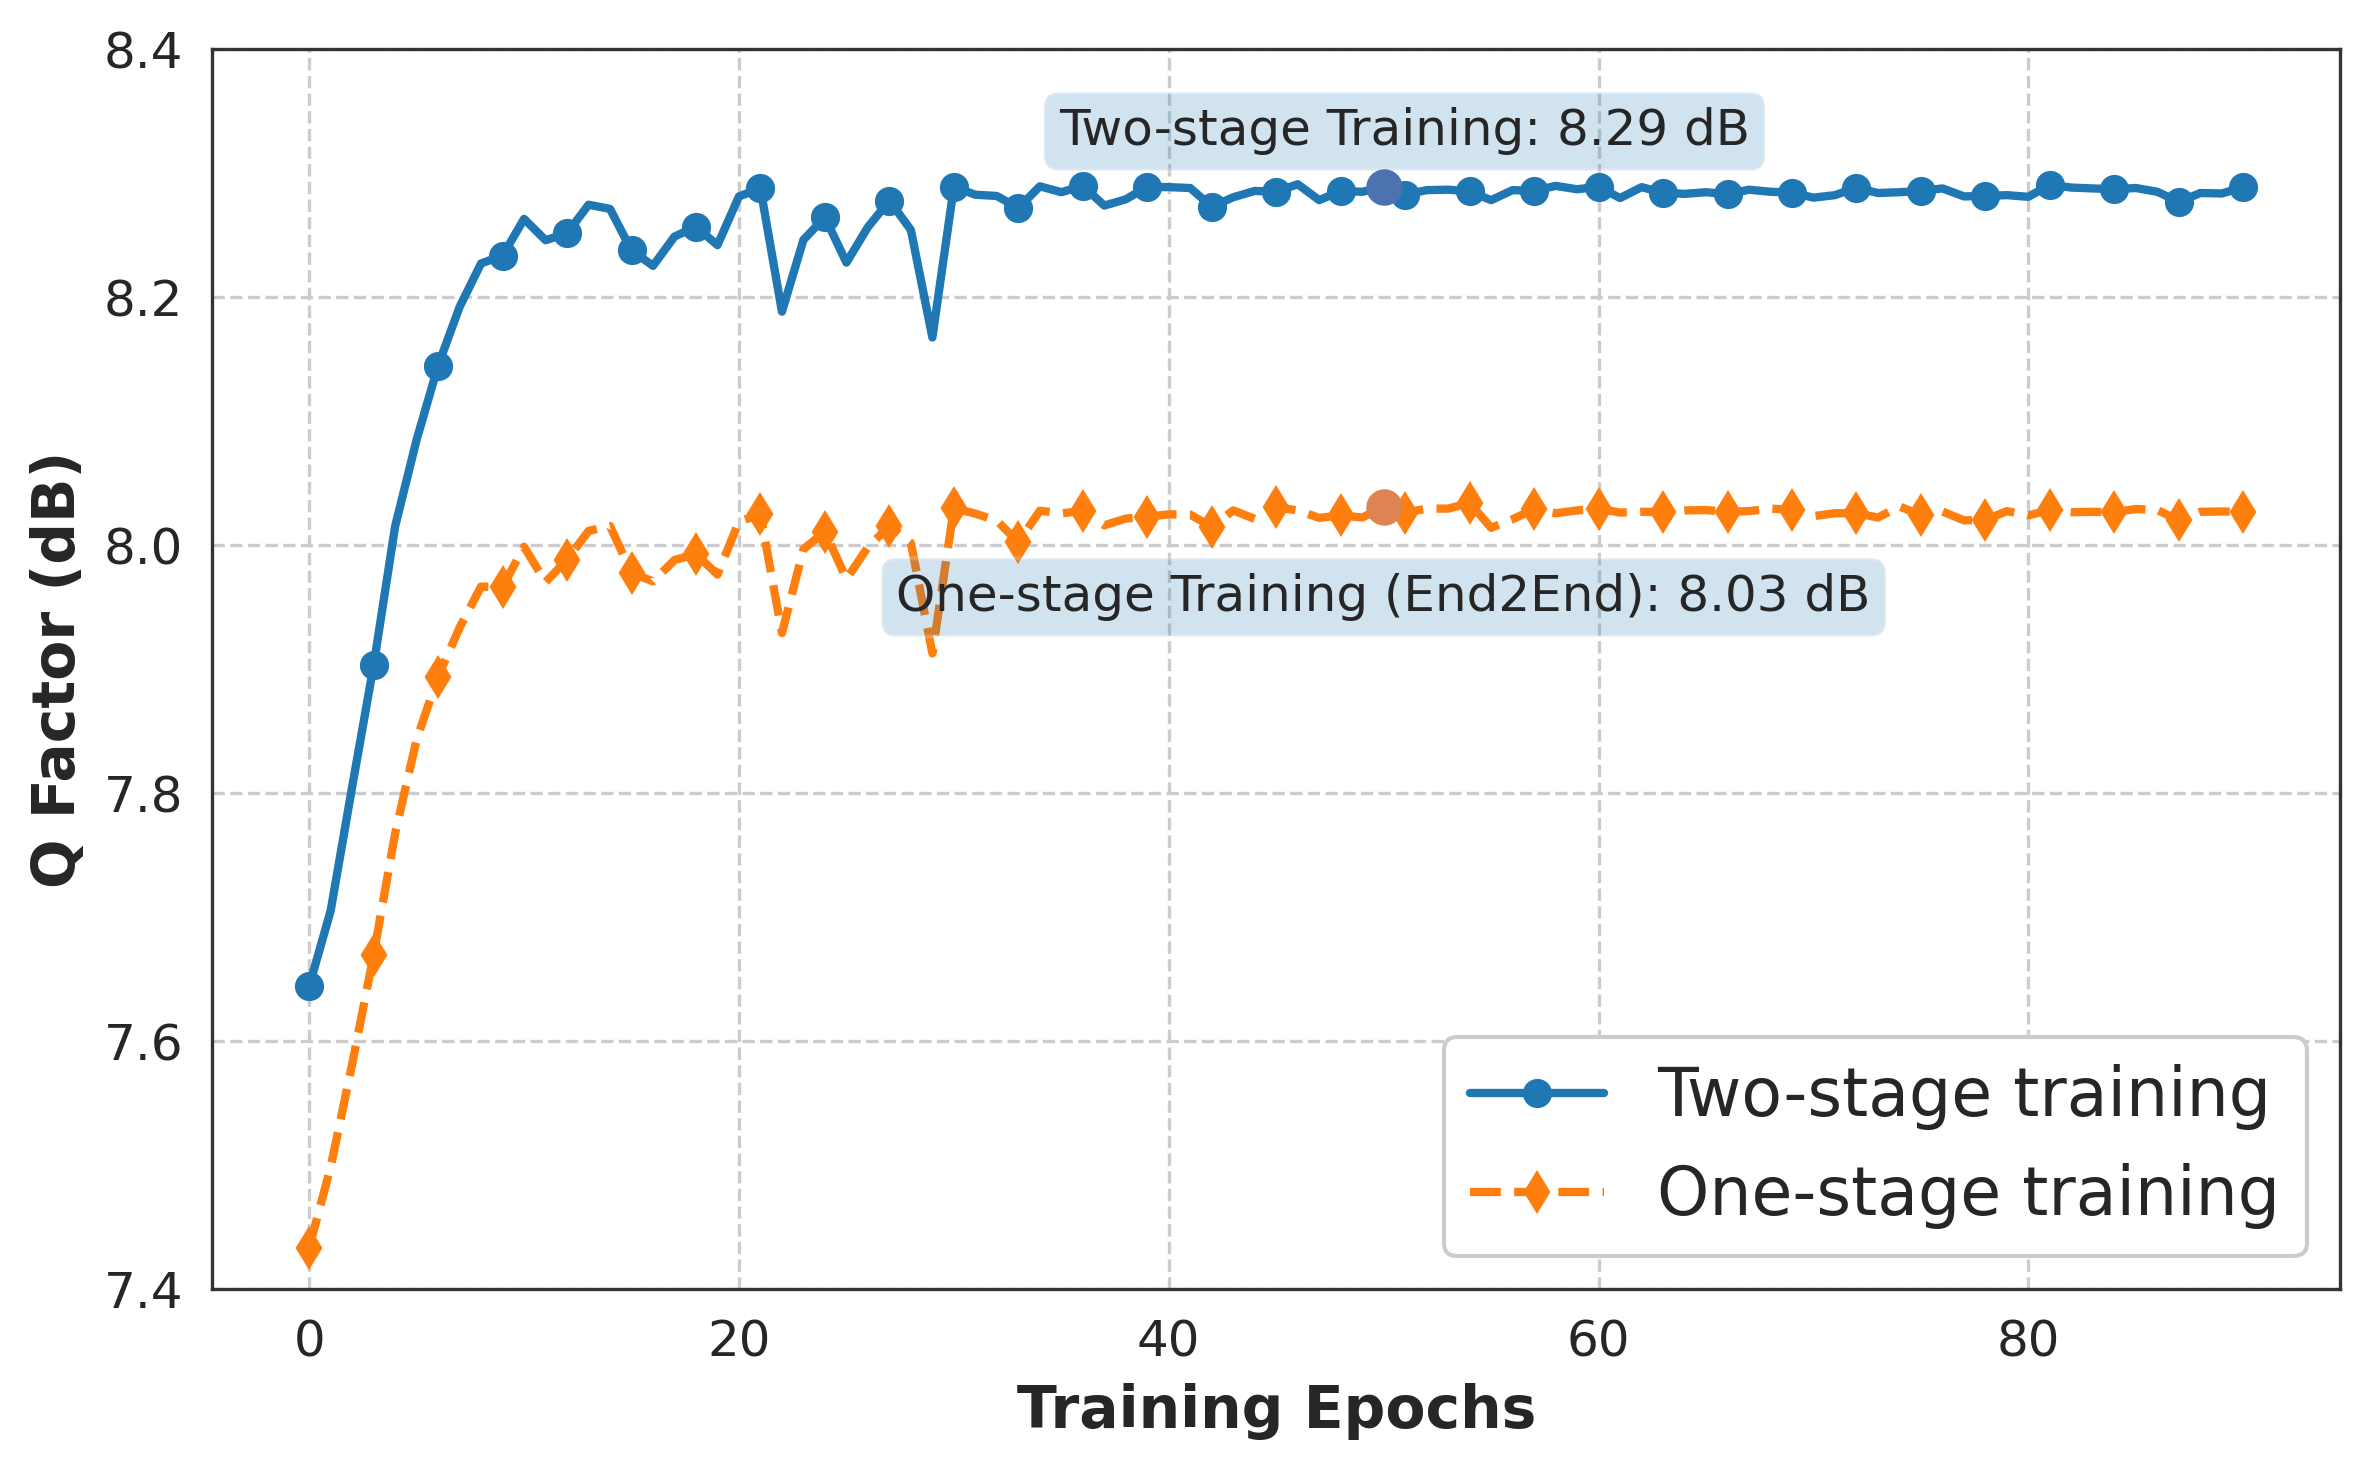

In [3]:
import seaborn as sns

# Set Seaborn style for academic publication (whitegrid with improved readability)
sns.set_style("whitegrid", {
    'grid.linestyle': '--',
    'grid.alpha': 0.4,
    'axes.edgecolor': '0.2',
    'axes.linewidth': 1.2,
    'xtick.major.size': 4,
    'ytick.major.size': 4,
    # 'font.family': 'serif',
})

# Initialize figure with high resolution settings
plt.figure(figsize=(8, 5), dpi=300)

# Plot comparative training curves with distinct markers and line styles
sampling_rate = 1
plt.plot(
    steps[::sampling_rate], 
    value1[::sampling_rate], 
    label='Two-stage training', 
    linestyle='-', 
    marker='o', 
    markersize=6, 
    linewidth=2, 
    markevery=3,
    # color=sns.color_palette("deep")[0]  # Use Seaborn's default color palette
)
plt.plot(
    steps[::sampling_rate], 
    value2[::sampling_rate], 
    label='One-stage training', 
    linestyle='--', 
    marker='d', 
    markersize=6, 
    linewidth=2, 
    markevery=3,
    # color=sns.color_palette("deep")[1]  # Use a different color from the palette
)

# Configure axis labels with appropriate font sizes
plt.xlabel('Training Epochs',  fontsize=14, fontweight='bold')
plt.ylabel('Q Factor (dB)', fontsize=14, fontweight='bold')

# Set tick parameters for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust y-axis limits for better visualization
plt.ylim(7.4, 8.4)

# Position legend optimally

plt.legend(fontsize=16, loc='lower right', framealpha=1)  # Ensure legend is readable

# Mark and annotate performance at 50 training steps
epoch_50_index = steps.index(50)
epoch_50_value1 = value1[epoch_50_index]
epoch_50_value2 = value2[epoch_50_index]

plt.scatter(50, epoch_50_value1, color=sns.color_palette("deep")[0], zorder=5, s=60)
plt.scatter(50, epoch_50_value2, color=sns.color_palette("deep")[1], zorder=5, s=60)

# Add quantitative annotations with precise values
plt.annotate(
    f'Two-stage Training: {epoch_50_value1:.2f} dB', 
    (50, epoch_50_value1), 
    textcoords="offset points", 
    xytext=(5, 10), 
    ha='center', 
    fontsize=12,
    bbox=dict(boxstyle='round,pad=0.3', alpha=0.2)  # Add subtle background for readability
)
plt.annotate(
    f'One-stage Training (End2End): {epoch_50_value2:.2f} dB', 
    (50, epoch_50_value2), 
    textcoords="offset points", 
    xytext=(0, -25), 
    ha='center', 
    fontsize=12,
    bbox=dict(boxstyle='round,pad=0.3', alpha=0.2)
)

# Tight layout to prevent label clipping
plt.tight_layout()

# Save the figure in high quality (uncomment for production)
plt.savefig('fig/fig9.png', bbox_inches='tight', dpi=300, format='png')